# Calculates the daily return distribution of each stock in the PSEI and plots it

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def return_distribution(closing_prices, stock):
    # Calculate the daily returns in percentage terms
    daily_returns = np.diff(closing_prices) / closing_prices[:-1] * 100

    # Plot the histogram of daily returns
    plt.hist(daily_returns, bins=1_000)
    plt.title(f'Distribution of daily returns for {stock}')
    plt.xlabel('Daily returns (%)')
    plt.ylabel('Frequency')
    plt.show()

    # Return the (daily_return, frequency in percentage) as a tuple of two numpy arrays
    return np.unique(daily_returns, return_counts=True)     

In [3]:
def value_at_risk(returns):
    return np.percentile(returns[0], 5)

In [4]:
def volatility(returns):
    return np.std(returns[0])

In [5]:
def drawdown(returns):
    return np.max(returns[0]) - np.min(returns[0])

In [6]:
stock_dict = {
    'MEG': [],
    'JGS': [],
    'BDO': [],
    'FGEN': [],
    'ICT': [],
    'ALI': [],
    'SMC': [],
    'TEL': [],
    'GLO': [],
    'BLOOM': [],
    'RLC': [],
    'MER': [],
    'AC': [],
    'PGOLD': [],
    'LTG': [],
    'MPI': [],
    'AP': [],
    'RRHI': [],
    'URC': [],
    'PSEI': [],
}

In [7]:
# Load data
for index, key in enumerate(stock_dict):
    # Loading of datasets to the dictionary of stocks
    # We will only use the closing prices, hence we set usecols to index:4
    data = np.genfromtxt(f'data/{key}.csv', delimiter=',', skip_header=1, usecols=4)
    stock_dict[key] = data

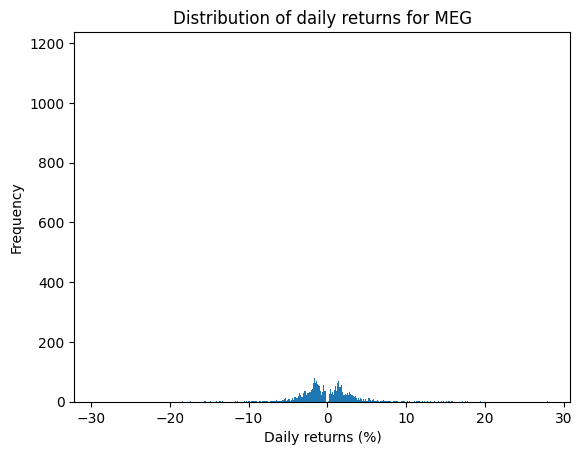

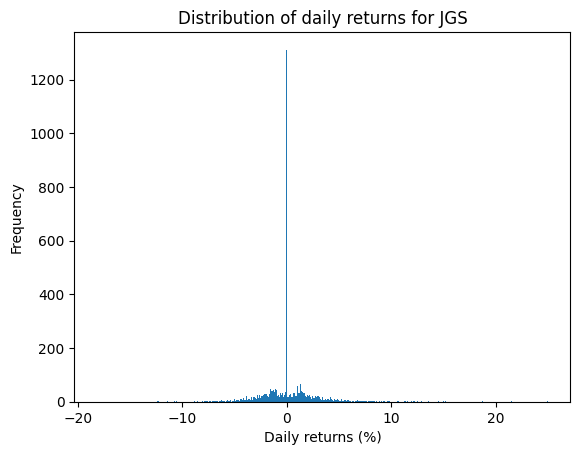

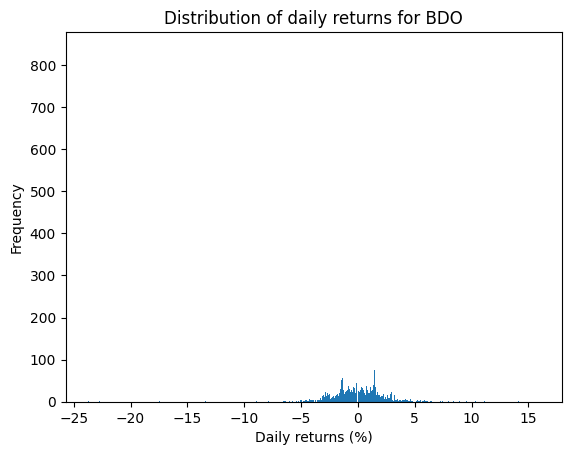

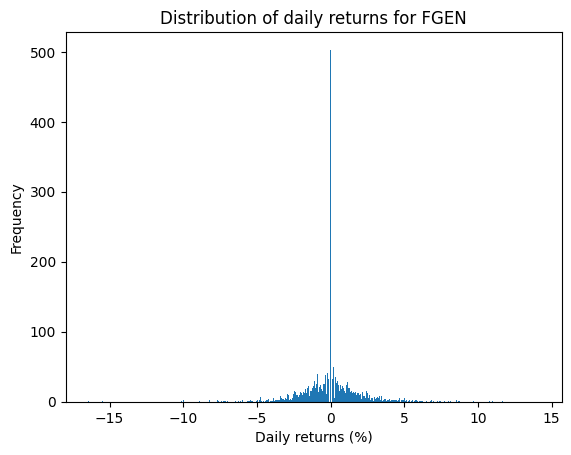

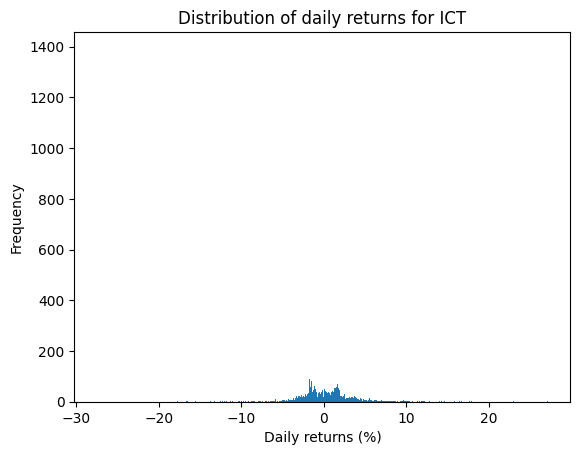

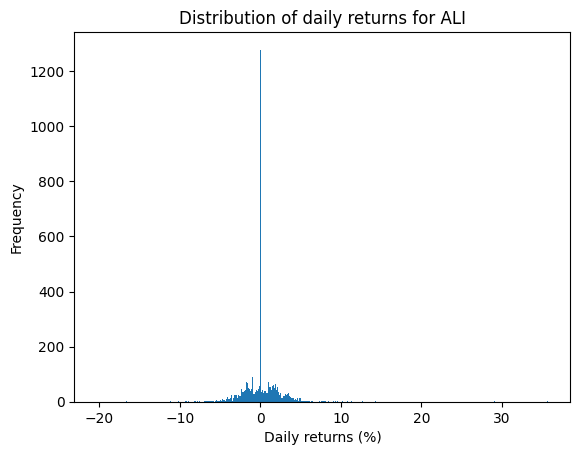

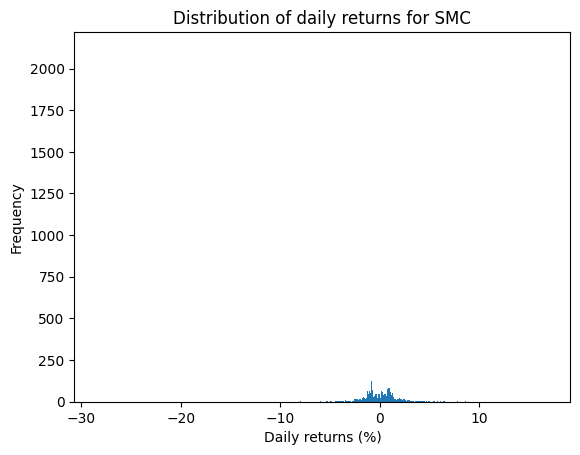

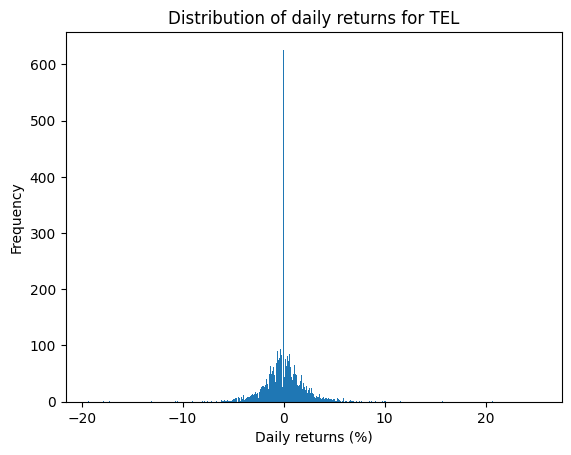

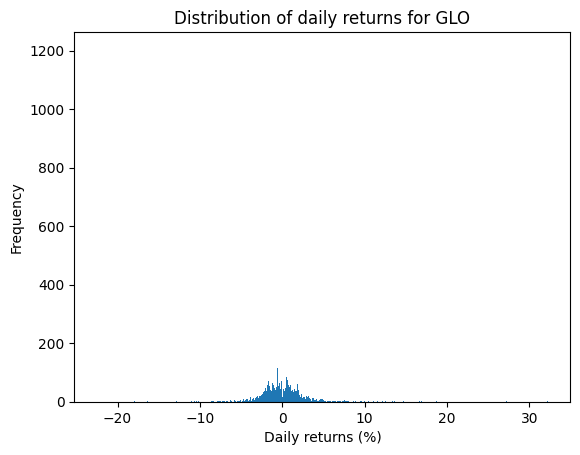

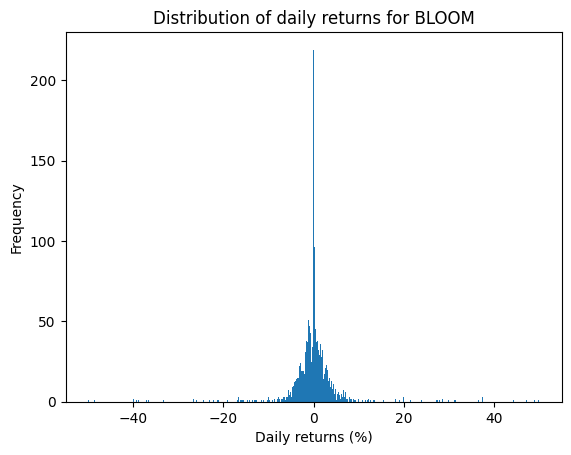

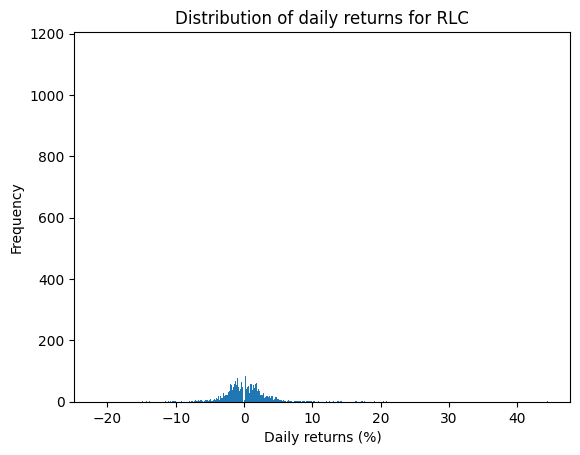

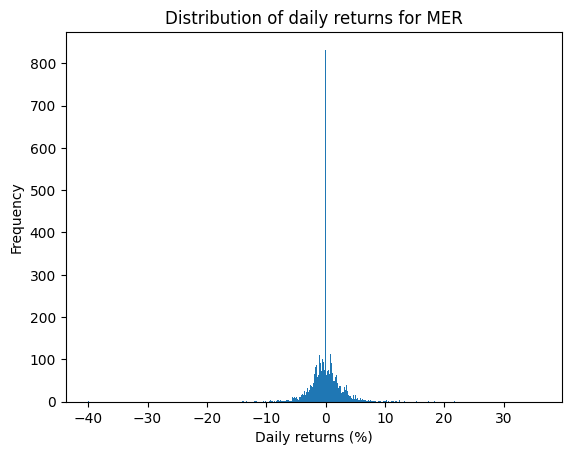

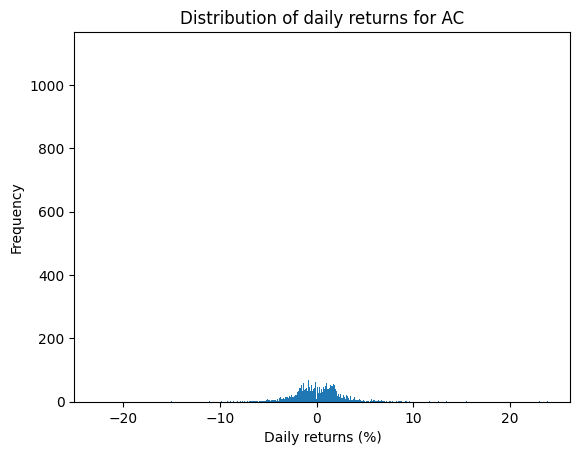

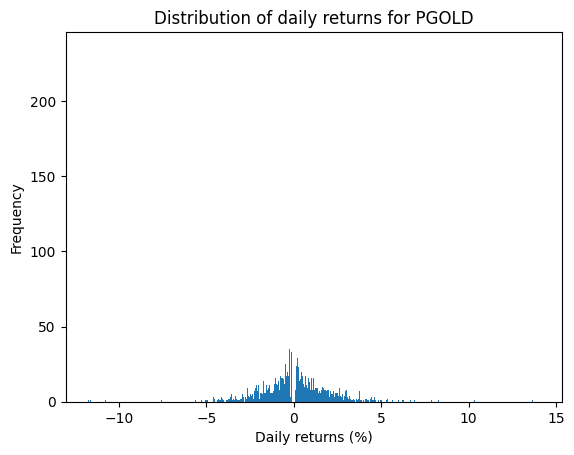

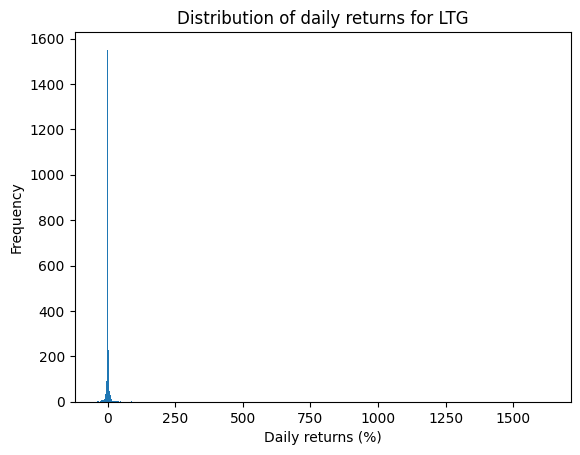

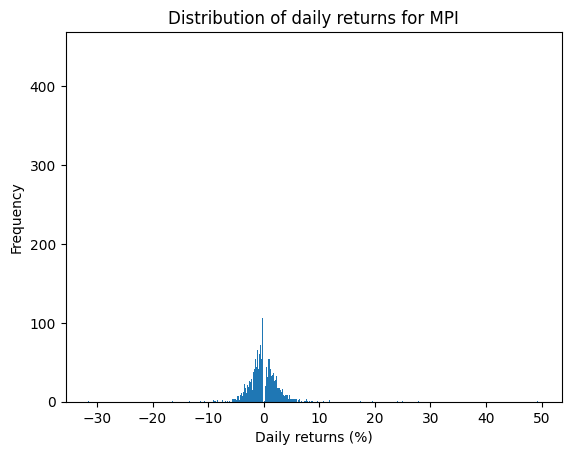

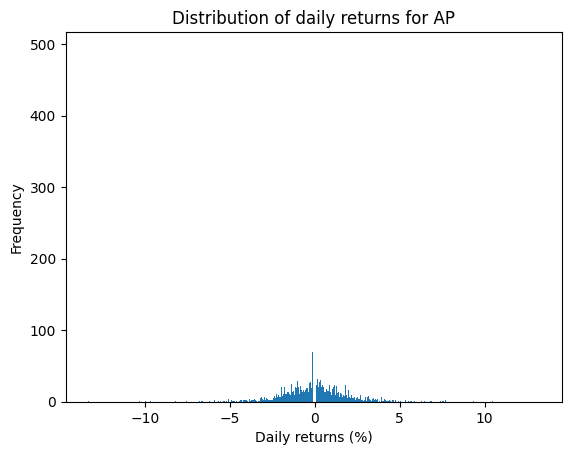

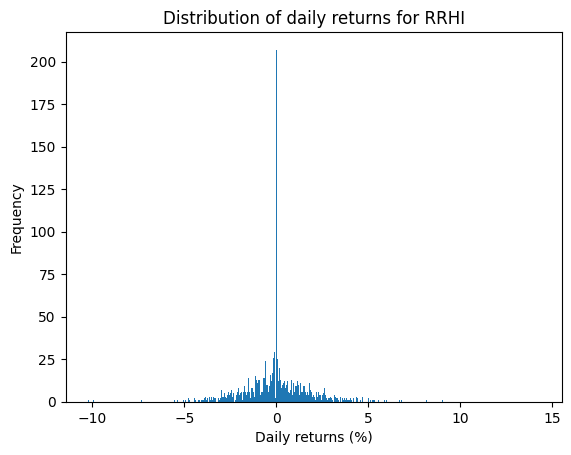

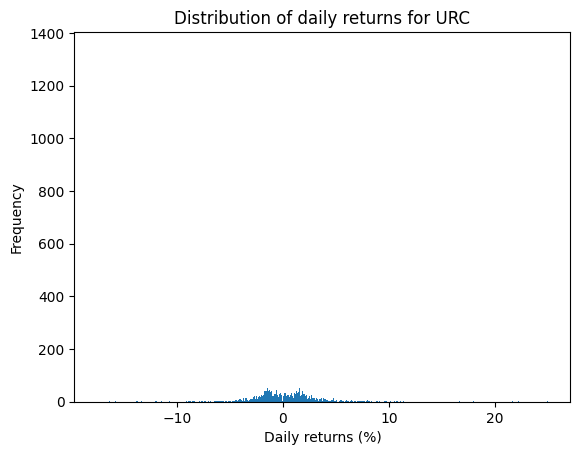

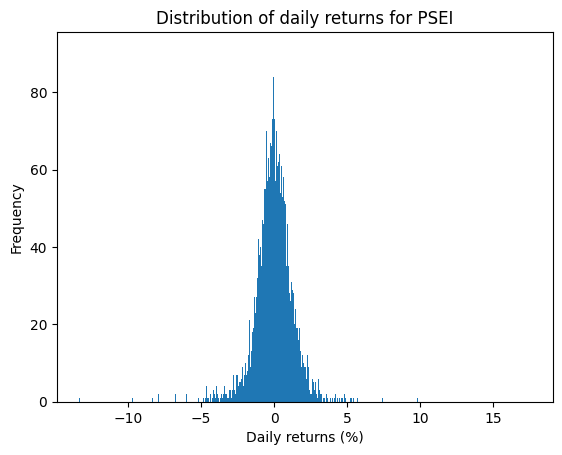

In [8]:
# Initialize a dataframe to store the (value_at_risk, volatility, drawdown) for each stock
df = pd.DataFrame(columns=['stock', 'value_at_risk%', 'volatility%', 'drawdown%', 'start_date', 'end_date'])

for stock in stock_dict:
    # Return Distribution
    returns = return_distribution(np.array(stock_dict[stock]), stock)
    # Value at Risk
    var = value_at_risk(returns)
    # Volatility
    vol = volatility(returns)
    # Drawdown
    dd = drawdown(returns)

    # start date and end date
    data = np.genfromtxt(f'data/{key}.csv', delimiter=',', skip_header=1, usecols=0, dtype=str)
    start_date = data[0]
    end_date = data[-1]

    # concat the (value_at_risk, volatility, drawdown) for each stock
    df = pd.concat([df, pd.DataFrame([[stock, var, vol, dd, start_date, end_date]], columns=['stock', 'value_at_risk%', 'volatility%', 'drawdown%', 'start_date', 'end_date'])])

In [9]:
# Export the dataframe to a csv file
df.to_csv('./risks_profile/return_distribution.csv', index=False)

In [10]:
df

,stock,value_at_risk%,volatility%,drawdown%,start_date,end_date
0,MEG,-5.365715,3.949969,57.248140,2000-01-03,2023-02-10
0,JGS,-4.762357,3.361099,43.184044,2000-01-03,2023-02-10
0,BDO,-3.302488,2.364049,39.670648,2000-01-03,2023-02-10
0,FGEN,-3.819079,2.559254,30.604259,2000-01-03,2023-02-10
0,ICT,-4.827050,3.520840,54.645013,2000-01-03,2023-02-10
0,ALI,-4.390485,3.070487,56.026166,2000-01-03,2023-02-10
0,SMC,-3.403674,2.385956,45.298783,2000-01-03,2023-02-10
0,TEL,-3.693763,2.460023,44.659116,2000-01-03,2023-02-10
0,GLO,-4.120044,3.092601,54.758065,2000-01-03,2023-02-10
0,BLOOM,-5.984996,7.061554,100.000000,2000-01-03,2023-02-10


In [11]:
# Save into a json file
df.to_json('./risks_profile/return_distribution.json', orient='records')